# Beginnen met Data Science les 1: statistiek

In deze eerste les leer je de basisbeginselen van de statistiek (of fris je deze kennis op ;-) ). Data science is in principe namelijk niet meer dan door een computer laten uitvoeren van statistische berekeningen om voorspellingen te doen - met dien verstande dat het *aantal* van deze berekeningen bij veel data science-toepassingen al gauw duizelingwekkend groot wordt.

De volgende onderwerpen komen in deze les en in dit notebook aan bod:

- Gemiddelde, mediaan en modus
- Standaarddeviatie en variantie
- De normaalverdeling
- Eenvoudige plots maken
- Inlezen gegeven uit CSV- en Excelbestanden
- Confidence intervals en vaststellen of twee steekproeven afkomstig zijn uit dezelfde onderliggende populatie
- P-waarden en significantie

## Uitvoeren op Google Colab

Dit notebook kan worden uitgevoerd op Google Colab. Hiervoor is een Google-account vereist.

Klik op de knop "Open in Google Colab" om het notebook te openen in Google Colab:


<a href="https://colab.research.google.com/github/mcdejonge/beginnen_met_data_science/blob/main/les_1_statistiek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In het codeblok hieronder worden alle bibliotheken ingeladen die in dit notebook worden gebruikt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.1 Beschrijvende statistiek

Statistiek is de tak van de wiskunde die uitspraken doet over numerieke gegevens. De technieken uit deze tak van de wiskunde worden gebruikt om een computer naar verzamelingen met data te laten kijken en daar patronen in te leren herkennen. Computers patronen laten herkennen in data science noemen we "Machine Learning" of AI en het is een deelgebied van data science. Ook in de andere deelgebieden van data science spelen statistische technieken echter een grote rol.

Statistiek is grofweg onder te verdelen in twee deelgebieden: *beschrijvende* statistiek, waarmee je verzamelingen numerieke gegevens beschrijft en samenvat, en *inferentiële* statistiek, waarmee je algemene conclusies onderbouwt over verzamelingen getallen. Inferentiële statistiek komt verderop aan bod. We beginnen hier met het beschrijven van data met behulp van statistische technieken.

Voor deze technieken gebruiken we de Python-bibliotheek "numpy". Een bibliotheek is een verzameling functies en methodes in een programmeertaal. "numpy" is een bibliotheek voor de programmeertaal Python waarin allerlei, soms zeer geavanceerde, functies voor het werken met getallen zijn ondergebracht.

### 1.1.1 Gemiddelde, mediaan en modus

Het eerste dat een statisticus of data scientist doet wanneer hij of zij een nieuwe verzameling getallen onder ogen krijgt, is achterhalen wat de *centrale tendens* is van de verzameling.

De *centrale tendens* kun je beschouwen als het *middelpunt* van de verzameling. Uitdaging hierbij is dat het niet altijd duidelijk is *waar* dat middelpunt te vinden is.

Voor deze voorbeelden werken we met de getallenreeks `[1, 2, 3, 4, 5, 6, 7, 8, 9]`

#### 1.1.1.1 Het rekenkundig gemiddelde (mean)

Een veelgebruikte maatstaf voor de centrale tendens van een verzameling getallen is het *rekenkundig gemiddelde* (vaak ook wel gewoon het "gemiddelde" genoemd - oftewel "mean" in het Engels).

Het gemiddelde bereken je door alle getallen in de verzameling bij elkaar op te tellen en het resultaat te delen door het aantal getallen.

In dit voorbeeld is het gemiddelde `5`, wat toevallig ook nog eens het middelste getal is wanneer je de getallen uit de voorbeeldreeks op volgorde zet van klein naar groot.

Laten we Python eens laten uitrekenen of het gemiddelde inderdaad `5` is:

In [28]:
np.mean([1, 2, 3, 4, 5, 6, 7, 8, 9])

np.float64(5.0)

Inderdaad, ook Python stelt vast dat het rekenkundig gemiddelde 5 is. Het geeft dit getal weer als `np.float64(5.0)` wat een manier is om aan te geven dat het een kommagetal is volgens een bepaalde indeling van numpy, maar het is duidelijk herkenbaar als het gewenste resultaat.

Voor dit voorbeeld geeft het rekenkundig gemiddelde netjes het middelste getal aan, maar dat is niet altijd het geval.
Stel we vervangen `8` en `9` in onze getallenreeks door `80` en `90` en rekenen het gemiddelde opnieuw uit:

In [29]:
np.mean([1, 2, 3, 4, 5, 6, 7, 80, 90])

np.float64(22.0)

Het gemiddelde is nu `22`. Rekenkundig klopt dat, maar het is een beetje vreemd om te stellen dat `22` het "midden" is van de getallenreeks `[1, 2, 3, 4, 5, 6, 7, 80, 90]`

We zien dat het rekenkundig gemiddelde erg gevoelig is voor grote verschillen tussen de getallen waaruit een verzameling bestaat.

Een klassiek voorbeeld van dit probleem is het volgende: stel, je vraagt 10 of 20 willekeurig gekozen mensen naar hun inkomen. Als je daar het gemiddelde van berekend, is de kans groot dat dat gemiddelde in de buurt komt van wat een gangbaar salaris is. Voeg je echter één van de beroemde Amerikaanse miljardairs toe aan je verzameling, dan schiet het gemiddelde inkomen ineens omhoog naar een onwaarschijnljk hoog bedrag waarvan de kans groot is dat geen enkele van de leden van je groep het ooit op hun rekening zullen zien staan.

De les is dan ook: *het rekenkundig gemiddelde is vooral geschikt voor gevallen waarin de waarden in de verzameling niet al te veel van elkaar verschillen*.

Daarbij is het ook nog eens zo dat die waarden enigszins regelmatig verdeeld moeten zijn tussen de laagste en de hoogste waarde in de verzameling - zie de paragraaf "De modus (mode)", verderop.



#### 1.1.1.2 De mediaan (median)

In gevallen waarin verschillen tussen waarden in de verzameling erg groot zijn en het rekenkundig gemiddelde dus niet zoveel zegt over waar het "midden" van de verzameling te vinden is, kan het nuttig zijn om de getallen simpelweg op volgorde te zetten en dan het middelste getal aan te wijzen. Dit middelste getal noemen we de *mediaan* (Eng: "median").

In het voorbeeld is de mediaan 5, en dat klopt:

In [30]:
np.median([1, 2, 3, 4, 5, 6, 7, 80, 90])

np.float64(5.0)

In dit voorbeeld zijn de getallen echter netjes verdeeld tussen de hoogste en de laagste waarde. Het wordt anders als die verdeling wat schever is:

In [31]:
np.median([1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 80, 90 ])

np.float64(3.0)

Het "middelste" getal is nu `3`, terwijl dat het op `2` na laagste getal is en er `6` getallen zijn die groter zijn! Het is raar om te zeggen dat dit getal "in het midden" ligt van deze reeks getallen!

Overigens is het nog steeds vreemd om het rekenkundig gemiddelde aan te wijzen als middelpunt van deze verzameling:

In [32]:
np.mean([1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 80, 90 ])

np.float64(15.846153846153847)

We moeten concluderen dat noch het gemiddelde nog de mediaan veel zeggen over deze verzameling.

Gelukkig is er nog een derde manier om een "middelste waarde" vast te stellen: de *modus* (Eng: "mode").

#### 1.1.1.3 De modus (mode)

De *modus* (Eng: "mode") is simpelweg het getal dat het vaakst voorkomt in een verzameling. In de getallenreeks `[1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 80, 90 ]` is dat `2`.

Helaas is het niet mogelijk om met numpy zonder meer de modus uit te rekenen. Waarom dit is, is niet helemaal duidelijk.

Om toch even wat code te laten zien, maken we alvast even gebruik van de bibliotheek "pandas" die we verderop zullen zien. Die heeft namelijk wél een "mode"-functie:

In [33]:
# Helaas moeten we wat extra werk doen om onze getallenreeks in pandas te krijgen.
# De extra code die hiervoor nodig is, kun je negeren. Het gaat hier om het resultaat.
pd.Series([1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 80, 90 ]).mode()

0    2
dtype: int64

Het is niet helemaal duidelijk waar we precies naar kijken, maar we zien in ieder geval het getal `2`, en dat lijkt correct te zijn.

Het probleem is hier dat er soms meer dan één modus in een verzameling getallen kan zijn, zoals in het volgende voorbeeld:

In [34]:
# Ook hier gaat het om het resultaat en kun je de code zelf negeren.
pd.Series([1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 80, 90 ]).mode()

0    2
1    7
dtype: int64

In deze reeks zijn twee modi: `2` en `7` komen alletwee even vaak voor. De `mode`-functie van pandas geeft een soort lijst terug met daarin elk van de twee modi.

Een reeks getallen met twee modi noemen we *bimodaal*. Een reeks kan echter nog meer modi hebben. In dat geval noemen we hem *multimodaal*.

Keren we terug naar het eerdere voorbeeld waarin we 10 tot 20 mensen vroegen naar hun inkomen en vervolgens ook een Amerikaanse multimiljardair aan de verzameling toevoegden. Voor deze reeks getallen is de modus waarschijnlijk de nuttigste waarde om het "midden" te beschrijven. 

Dat is dan ook de reden dat er in de politiek vaak wordt gesproken over het "modale inkomen": dat is het inkomen dat de meeste Nederlanders verdienen.

#### Opgave

Gebruik de code hierboven als voorbeeld om de volgende vragen te beantwoorden.

De vragen betreffen de volgende twee reeksen getallen:
```
S1:	[4, 15, 6, 18, 5, 18, 4, 18, 6, 12]
S2:	[4, 15, 6, 18, 5, 18, 4, 18, 6, 120]
```

1. Bereken voor beide reeksen het gemiddelde en de mediaan in Python. Bereken ook (handmatig) de modus.
2. Verklaar de verschillen.
3. Welke meetwaarde zou je gebruiken om het "midden" van reeks S1 te bepalen en waarom?
3. Welke meetwaarde zou je gebruiken om het "midden" van reeks S2 te bepalen en waarom?

In [ ]:
# Plaats hier je Python-code. De reeksen S1 en S2 zijn al gegeven
s1 = [4, 15, 6, 18, 5, 18, 4, 18, 6, 12]
s2 = [4, 15, 6, 18, 5, 18, 4, 18, 6, 120]

### 1.1.2 Standaarddeviatie en variantie

Vaak willen we niet alleen weten wat het "middelste" getal is maar ook hoeveel de getallen in de data *afwijken* van dat middelste getal.

Hoeveel getallen in data van elkaar afwijken noemen we *variantie*. We berekenen het door van elk van de getallen het *kwadraat* te berekenen van het verschil tussen dat getal en het rekenkundig gemiddelde van de gehele reeks getallen. De gevonden waarden tellen we bij elkaar op en delen we door het aantal getallen in de reeks.

In wiskundige notatie ziet dat eruit als volgt:

$$
\frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}
$$

Hier staat: gegeven een reeks van $n$ waarden, trek voor elk van die waarden het rekenkundig gemiddelde ($\mu$) af van de waarde ($x_i$ is het $i$-de getal uit de reeks) en kwadrateer dat (vermenigvuldig het met zichzelf). Neem de som ($\sigma$) van de resultaten en deel dat door het aantal waarden ($n$).

**VRAAG** : waarom wordt het verschil tussen de waarden en het getal gekwadrateerd?

Variantie is een nuttige maatstaf, maar er kleeft een nadeel aan: het is het kwadraat van het verschil.

Stel, we hebben een reeks lichaamslengtes. Voor Nederlandse vrouwen is de gemiddelde lengte `170,6` cm. De variantie is `39,63` - dat wil dus zeggen $39,63 cm^2$!

Maar wat is een $cm^2$? Dat is in de context van lichaamslengte natuurlijk een onzinnige eenheid. Wat we eigenlijk willen, is dat de afwijking van het gemiddelde wordt uitgedrukt in dezelfde eenheid als de getallen zelf.

Om dat te doen, moeten we het effect van het kwadrateren ongedaan maken (namelijk door de wortel te nemen van de gevonden variantie).

De wortel van de variantie noemen we de *standaarddeviatie* (ook wel *standaardafwijking* genoemd of, in het Engels, "standard deviation").

De formule ervoor luidt:

$$
\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}}
$$

Deze formule is identiek aan de vorige, behalve dat er aan het einde een wortel wordt getrokken. Het resultaat wordt vaak aangeduid met het Griekse symbool $\sigma$ (sigma).

(De standaarddeviatie voor de lichaamslengte van vrouwen in Nederland is overigens `6,3`).

Numpy maakt het eenvoudig om de standaarddeviatie van een reeks getallen uit te rekenen:

In [35]:
np.std([1, 2, 3, 4, 5, 6, 7, 8, 9])

np.float64(2.581988897471611)

Met deze reeks getallen is de standaarddeviatie tamelijk hoog, namelijk bijna een kwart van het verschil tussen het hoogste en het laagste getal. De reden hiervoor is dat de getallen zeer gelijkmatig zijn verspreid tussen dat hoogste en laagste getal. In veel andere getallenreeksen uit de werkelijkheid is dat veel minder. Er zijn bijvoorbeeld weinig volwassen vrouwen in Nederland die kleiner zijn dan `110` cm. Ook het aantal vrouwen dat groter is dan `220 cm` is zeer, zeer beperkt. Dit blijkt ook uit de standaarddeviatie: die bestrijkt met `6,3` cm slechts een klein deel van de mogelijke waarden.

In de volgende paragraaf zullen we zien dat dat heel gebruikelijk is.

#### Opgave

Gebruik de code hierboven als voorbeeld om de volgende vragen te beantwoorden.

De vragen betreffen opnieuw de volgende twee reeksen getallen:

```
S1:	[4, 15, 6, 18, 5, 18, 4, 18, 6, 12]
S2:	[4, 15, 6, 18, 5, 18, 4, 18, 6, 120]
```

1. Bereken voor beide reeksen de standaarddeviatie en verklaar het verschil.

In [ ]:
# Plaats hier je Python-code. De reeksen S1 en S2 zijn al gegeven
s1 = [4, 15, 6, 18, 5, 18, 4, 18, 6, 12]
s2 = [4, 15, 6, 18, 5, 18, 4, 18, 6, 120]



s1 5.885575587824864 vs s2 33.386224704209965


### 1.1.3 De normaalverdeling

In veel getallenreeksen in de echte wereld liggen de waarden tamelijk dicht bij elkaar. In het geval van de lichaamslengte van vrouwen in Nederland hebben bijvoorbeeld 68% van de vrouwen een lichaamslengte die minder dan `6,3`cm (dwz de standaarddeviatie) van het gemiddelde afwijkt. **95%** van de vrouwen heeft een lichaamslengte die minder dan twee keer die standaarddeviatie (`12,6` cm) van het gemiddelde afwijkt.

Een dergelijke verdeling komt heel vaak voor. Zo vaak dat hij een eigen naam heeft gekregen: de *normaalverdeling*.

De normaalverdeling ziet er uit zoals in het plaatje hieronder:

<img src="img/mit_sigma.jpg" alt="Source: https://news.mit.edu/2012/explained-sigma-0209" />

(kun je het plaatje niet zien, klik dan op deze link: [https://news.mit.edu/2012/explained-sigma-0209](https://news.mit.edu/2012/explained-sigma-0209) )

Een *normaalverdeling* (Eng: "normal distribution") is een verdeling van getallen waarbij het rekenkundig gemiddelde precies in het midden staat (en dus ook de mediaan is) én het vaakst voorkomende getal is (het is dus ook de modus). 

Verder is het bij de normaalverdeling zo dat 68% van de getallen binnen één standaarddeviatie (sigma oftewel $\sigma$) van het gemiddelde valt, en 95% binnen twéé standaarddeviaties.

Zoals gezegd, de normaalverdeling komt in de werkelijkheid heel vaak voor. Hoe dat kan is te zien op het filmpje achter de link hieronder:

[https://www.youtube.com/watch?v=EvHiee7gs9Y](https://www.youtube.com/watch?v=EvHiee7gs9Y)

Of een bepaalde reeks getallen een normaalverdeling vormt of niet, kun je uitrekenen. Dat is echter wel wat omslachtig. Vaak volstaan statistici en data scientists ermee om een grafiekje te maken van hun data om te *kijken* of ze met een normaalverdeling te maken hebben.

Dat gaan wij ook doen, maar daarvoor moeten we eerst grafiekjes leren maken.

## 1.2 Eenvoudige plots maken

Tot het belangrijkste gereedschap van de data scientist behoort het maken van grafieken. Getallen zijn de ruwe grondstof waar ze mee werken, maar om echte inzichten op te kunnen doen is het vaak noodzakelijk ze op de één of andere manier grafisch in beeld te brengen.

Voor het in beeld brengen van getallenreeksen in Python gebruiken we de bibliotheek `matplotlib`.

Hier is een voorbeeld van een grafiek van onze inmiddels welbekende getallenreeks `[1, 2, 3, 4, 5, 6, 7, 8, 9]`

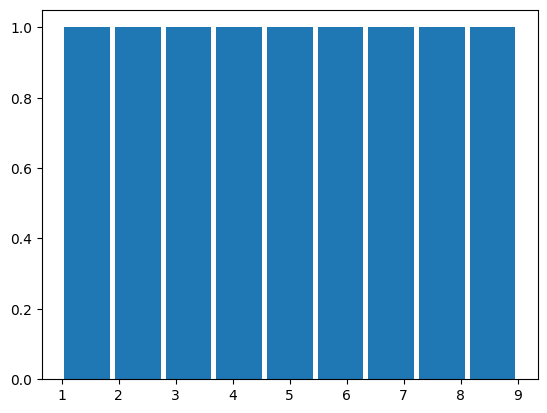

In [41]:
plt.hist([1, 2, 3, 4, 5, 6, 7, 8, 9], bins=9, rwidth=0.9)
plt.show()

### 1.2.1 Histogrammen

Een grafiek van dit type noemen we een "histogram". In dit grafiektype geef je weer hoe vaak elke waarde in je data voorkomt.

In dit geval zien we dat elk getal precies even vaak (namelijk één keer) voorkomt.

Dat is anders in de grafiek hieronder, voor de getallenreeks `[1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 80, 90 ]` (ook die hebben we eerder gezien):

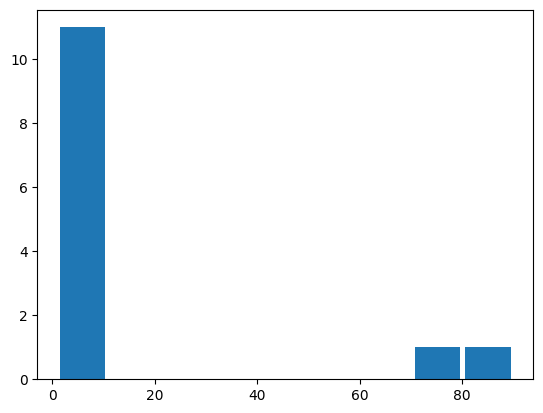

In [44]:
plt.hist([[1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 80, 90 ]], bins=9, rwidth=0.9)
plt.show()

We zien hier dat de lage getallen vaker voorkomen dan de hoge. We zien hier ook gelijk een nadeel aan deze grafiekvorm: als erg veel verschil zit tussen de getallen, worden er erg veel waarden op een grote hoop gegooid.

Hier nog een derde voorbeeld. We gebruiken numpy om een normaalverdeling te genereren en tonen deze in een grafiek.

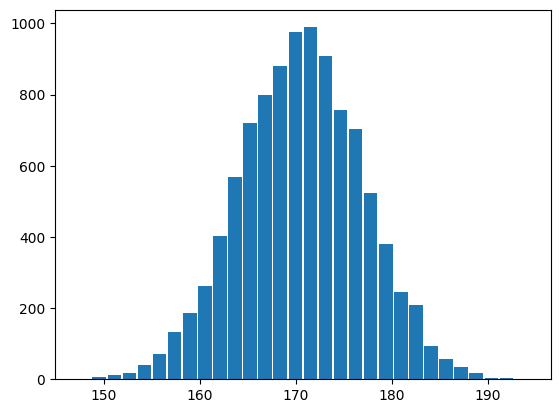

In [ ]:
np.random.seed(14) # Nodig om het resultaat reproduceerbaar te maken

# Maak 10.000 lichaamslengtes aan voor Nederlandse vrouwen
lichaamslengte_f = np.random.normal(170.6, 6.3, 10000)
# Toon deze
plt.hist(lichaamslengte_f, bins=30, rwidth=0.9)
plt.show()

We zien dat de vorm van de grafiek de normaalverdeling aardig benaderd. Hoe meer waarden je toevoegt, hoe vloeiender de "curve" wordt. Probeer maar (of probeer juist het aantal waarden te verminderen door de derde parameter van de functie np.random.normal kleiner te maken).

### 1.2.2 Box plots

Er is nog een andere, veelgebruikte manier om de "vorm" van een reeks getallen weer te geven. Deze vorm noemen we de "box plot".

Hieronder zie je de fictieve reeks lichaamslengtes in de vorm van een box plot.

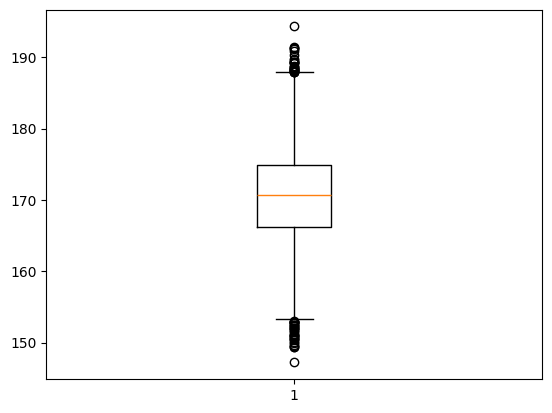

In [84]:
np.random.seed(14) # Nodig om het resultaat reproduceerbaar te maken

# Maak 10.000 lichaamslengtes aan voor Nederlandse vrouwen
lichaamslengte_f = np.random.normal(170.6, 6.3, 10000)
# Toon deze
plt.boxplot(lichaamslengte_f)
plt.show()

De middelste lijn is het middelste getal van de reeks (de mediaan, die hier samenvalt met het gemiddelde omdat de getallen normaal zijn verdeeld). De bovenste rand van de "box" geeft de waarde aan van het derde kwartiel (75% of drie kwart van de vrouwen heeft een kortere lichaamslengte dan deze) en de onderste de waarde van het eerste kwartiel (25% van de vrouwen heeft een lichaamslengte die kleiner is dan deze waarde). De horizontale lijnen boven en onder de box geven de grenzen aan van wat als "normale" waarden wordt beschouwd terwijl de cirkels waarden weergeven die als "abnormaal" ("outliers") worden beschouwd.

Wat precies "abnormaal" is , is in te stellen, maar als je deze boxplot vergelijkt met het histogram hierboven zul je zien dat het inderdaad om maar een heel, heel klein deel van de waarden gaat.

Een boxplot is erg nuttig om vast te stellen of een verdeling scheef is of niet en hoe groot de spreiding is in de waarden.

Bekijken we bijvoorbeeld de getallenreeks `[1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 80, 90 ]` als boxplot, dan zien we het volgende:

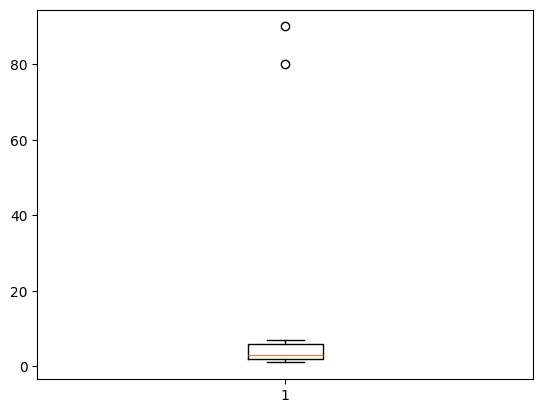

In [85]:
plt.boxplot([1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 80, 90 ])
plt.show()

Het is *onmiddellijk* duidelijk dat de getallen 80 en 90 sterk afwijken van de overige getallen. Ook zien we dat de verdeling van de overige getallen scheef is.

Dat kunnen we beter in beeld brengen door de sterk afwijkende getallen (de outliers) uit de grafiek te halen:

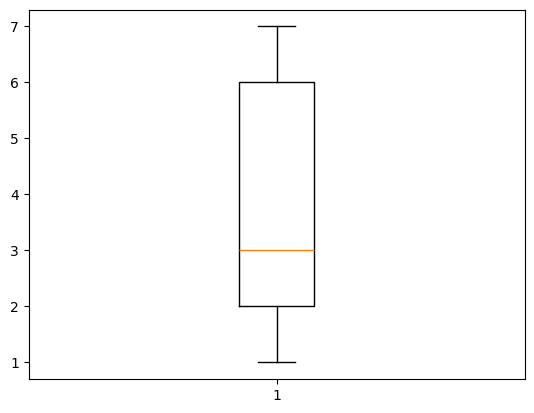

In [86]:
plt.boxplot([1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 80, 90 ], showfliers = False)
plt.show()

### 1.2.3 Scatter plots

Een derde type grafiek dat veel wordt gebruikt, is de zogenoemde scatterplot. Dit grafiektype maakt het mogelijk om twee reeksen getallen met elkaar te vergelijken.

Laten we bij wijze van voorbeeld twee getallenreeksen maken en die tegen elkaar afzetten.

De twee getallenreeksen zijn `[1, 2, 3, 4, 5, 6, 7, 8, 9]` en `[1, 1, 2, 2, 3, 3, 4, 5, 6]` (merk op dat beide reeksen dezelfde lengte moeten hebben).

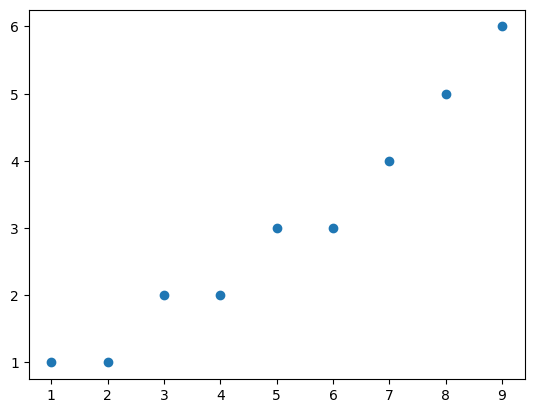

In [87]:
r1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
r2 = [1, 1, 2, 2, 3, 3, 4, 5, 6]
plt.scatter(r1, r2)
plt.show()

Er is een duidelijk verband tussen de eerste reeks, `r1` en de tweede, `r2`, maar ze komen niet precies met elkaar overeen.

In dit geval hadden we dat zelf ook wel aan de getallen kunnen zien, maar vaak is het verschil minder duidelijk, bijvoorbeeld omdat we met veel meer data te maken hebben.

Om goed het nut van scatterplots te kunnen zien, hebben we wat echte data nodig. Die gaan we nu inlezen.

## 1.3 Inlezen van gegevens

## 1.4 Inferentiële statistiek

steekproeven

### 1.4.1 Confidence intervals

### 1.4.2 T-tests: Vaststellen of twee steekproeven afkomstig zijn uit dezelfde populatie

### 1.4.3 P-waarden en statistische significantie